In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")
noZ = data[data['director_name'] != '0']

In [5]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [6]:
directorCount = noZ['director_name'].value_counts().nlargest(10).index
#directorCount


<AxesSubplot:xlabel='director_name', ylabel='gross'>

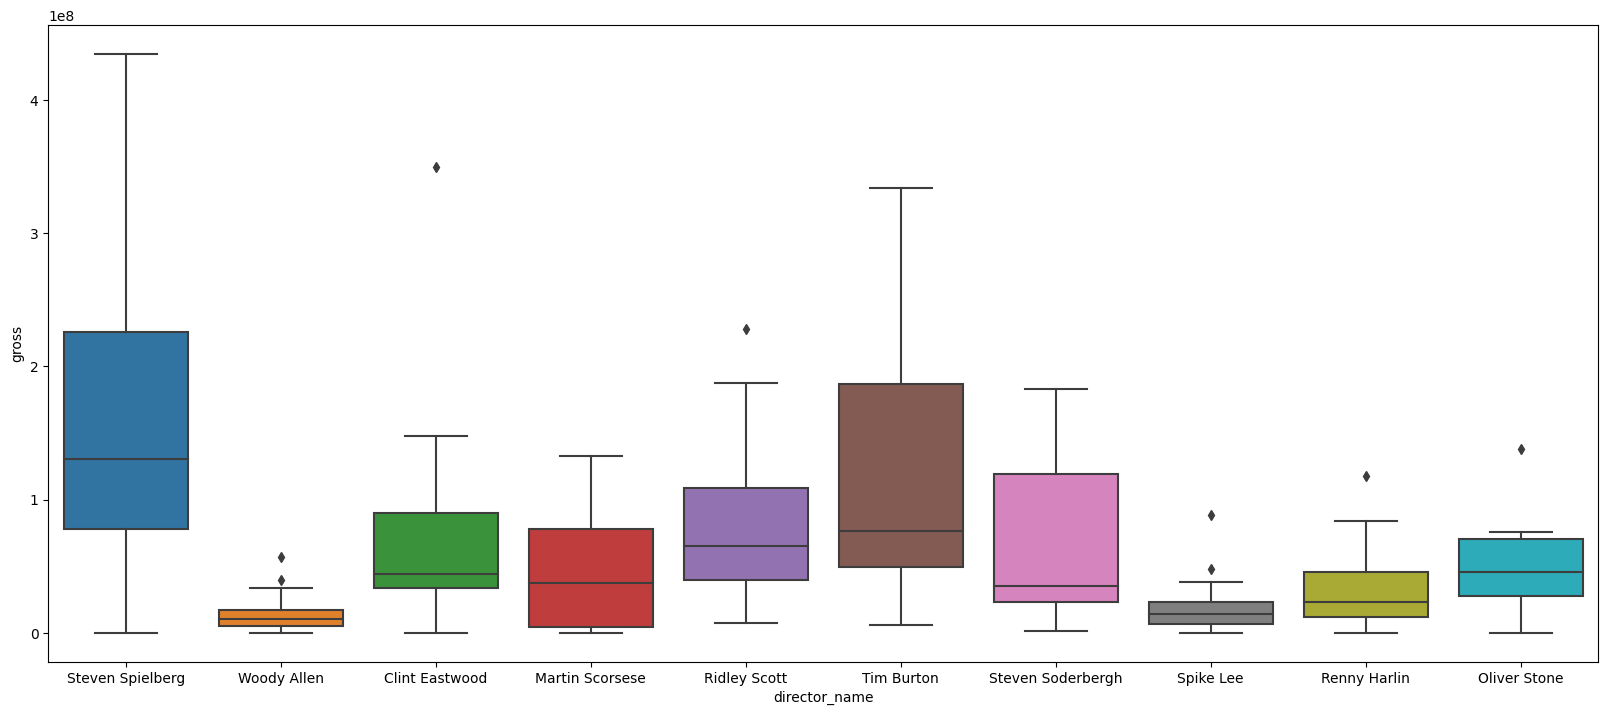

In [7]:
a4_dims = (20, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x=noZ['director_name'], y=noZ['gross'], order=directorCount, ax=ax)

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

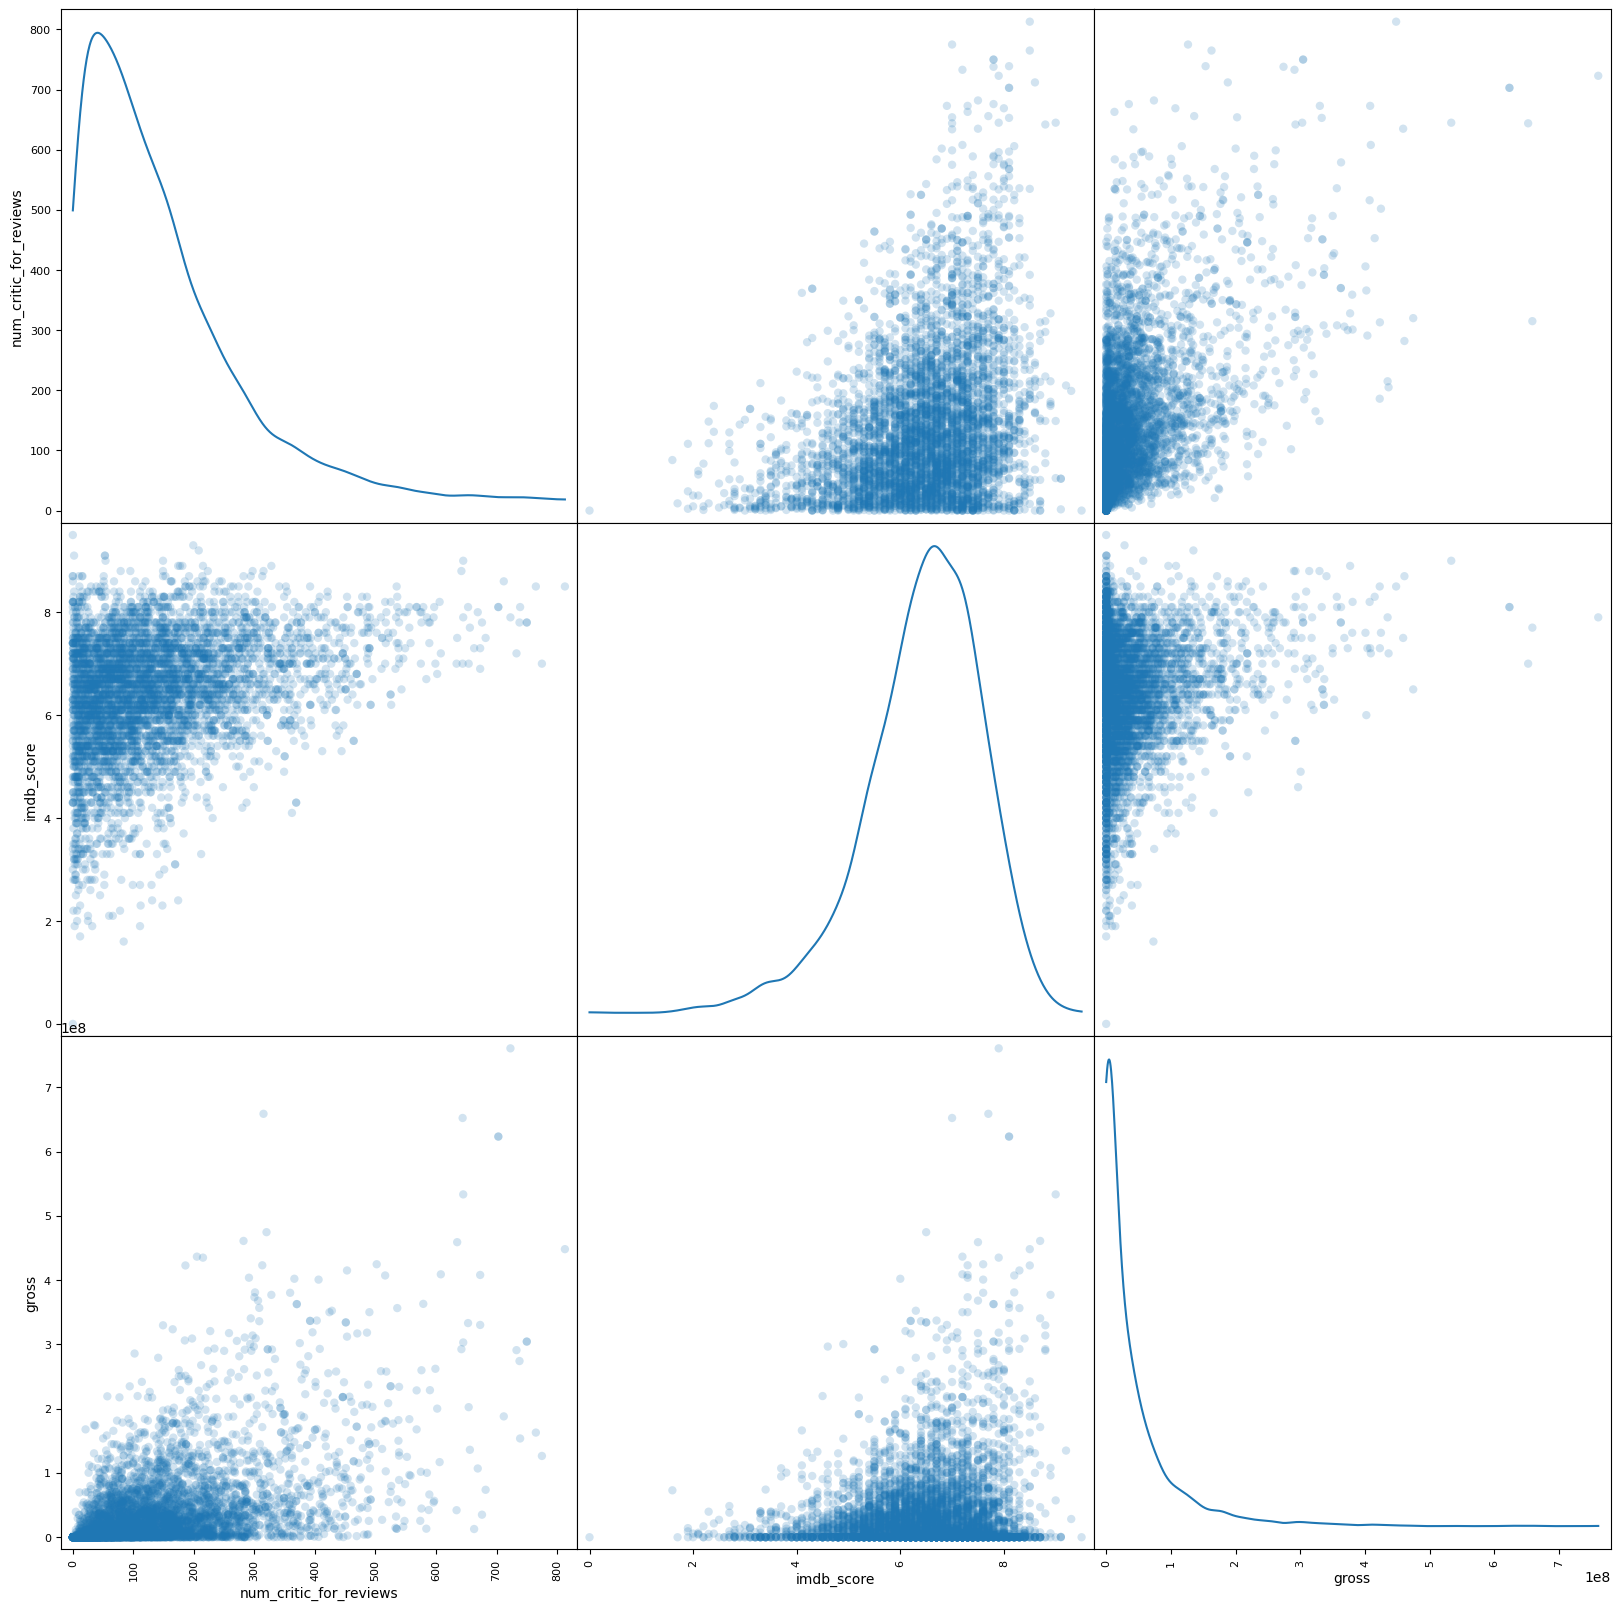

In [8]:
from pandas.plotting import scatter_matrix

cols = ["num_critic_for_reviews", "imdb_score", "gross"]
scatter_matrix(data[cols], alpha=0.2, figsize=(20, 20), 
               diagonal='kde', marker='o')
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [9]:
data['sales'] = data['gross'] - data['budget']
data['sales']

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
4               0.0
           ...     
5039            0.0
5040        -1400.0
5041        10443.0
5042        84122.0
5043            0.0
Name: sales, Length: 5044, dtype: float64

## Which directors garnered the most total sales?

In [12]:
mst = data.groupby("director_name")["sales"].sum().sort_values(ascending=False)
mst

director_name
Steven Spielberg    2.451332e+09
George Lucas        1.386641e+09
James Cameron       1.199626e+09
Joss Whedon         1.000887e+09
Chris Columbus      9.417076e+08
                        ...     
Hayao Miyazaki     -2.444860e+09
Lajos Koltai       -2.499804e+09
Katsuhiro Ôtomo    -3.226670e+09
Chan-wook Park     -4.210905e+09
Joon-ho Bong       -1.224794e+10
Name: sales, Length: 2400, dtype: float64

## Plot sales and average likes as a scatterplot. Fit it with a line.

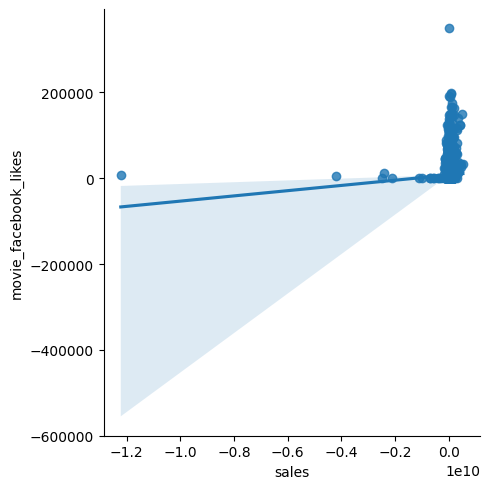

In [13]:
sns.lmplot(x="sales", 
           y='movie_facebook_likes',
           data=data)



## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

In [14]:
gFour = ['Romance','Comedy','Action','Fantasy']
genr = data[data['genres'].isin(gFour)].groupby('genres')['sales'].sum().nlargest()
genr

genres
Comedy     3.410157e+09
Fantasy    1.249586e+07
Romance   -7.293430e+07
Action    -2.333746e+08
Name: sales, dtype: float64

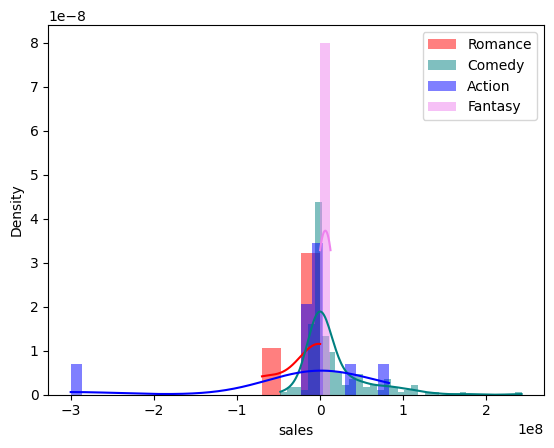

In [15]:
ax = sns.histplot(data[data['genres'] == 'Romance']["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['genres'] == 'Comedy']["sales"], color="teal", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Action']["sales"], color="blue", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Fantasy']["sales"], color="violet", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [16]:
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes']].mean(axis=1)
data['average_actor_likes']

0         930.333333
1       15333.333333
2        3851.333333
3       24333.333333
4          47.666667
            ...     
5039      584.333333
5040        0.000000
5041      718.000000
5042       41.666667
5043        0.000000
Name: average_actor_likes, Length: 5044, dtype: float64

## Copying the whole dataframe

In [17]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newDf = df.select_dtypes(include=numerics)
#newDf

In [19]:
def norm(tDf):
    dclm = list(tDf.columns)
    for i in dclm:
        max = tDf[i].max()
        min = tDf[i].min()
        tDf['nm_'+i] = (tDf[i] - min) / (max-min)
    return tDf
norm(newDf)

,Unnamed: 0,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio,nm_movie_facebook_likes,nm_sales,nm_average_actor_likes
0,0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,...,0.000000,0.603557,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,...,0.000000,0.244664,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868.0,11700.0,1.0,...,0.023256,0.196443,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,...,0.000000,0.533794,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,4,0.0,0.0,131.0,0.0,131.0,0.0,8.0,143.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,43.0,43.0,0.0,319.0,841.0,0.0,73839.0,1753.0,1.0,...,0.023256,0.070949,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.002676
5040,5040,13.0,76.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,...,0.000000,0.000593,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000000
5041,5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255.0,2386.0,5.0,...,0.116279,0.001779,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.003289
5042,5042,43.0,90.0,16.0,16.0,86.0,85222.0,4285.0,163.0,0.0,...,0.000000,0.016601,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000191
